In [1]:
import scipy
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
import scipy.io as sio
from scipy.spatial import distance

In [2]:
df = pd.read_csv('first_4_cat.csv', index_col=0)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,35.465594,31.727761,35.698743,-30.312840,-21.582826,-0.337650,-11.765897,-35.742532,-34.001286,-4.285622,...,-0.673090,-1.415774,-0.013816,0.104836,1.527999,-0.668115,0.909700,0.862060,-0.460878,-0.276017
1,23.533553,50.739261,53.222709,-21.430387,-13.310794,-12.352504,11.267678,-18.424069,-15.794107,26.992454,...,0.269234,-1.736806,-2.463822,-1.202074,2.759467,-0.482658,-0.350088,2.519334,0.599276,0.115672
2,5.590739,17.349084,-14.069068,-8.329114,-7.011103,-51.817567,-22.478955,4.223894,-9.455104,3.271907,...,-1.637841,0.438760,0.375131,0.512453,-0.690408,2.127772,0.587122,0.218709,-0.268325,0.371800
3,-61.147514,28.685636,6.592824,-10.221964,8.073822,-27.077101,1.197829,5.684597,3.108347,12.659446,...,-0.381190,0.322020,-0.159043,-0.244027,0.624835,-0.424401,0.143956,-1.452637,1.487530,0.309202
4,-43.282559,10.164773,43.280665,-54.552855,-4.507417,-0.820847,-1.748697,-20.275140,0.828717,1.784607,...,-1.941288,-1.157978,0.868561,0.060343,-0.842460,1.282204,0.544157,0.069407,0.691365,0.119829


In [4]:
labels = np.loadtxt('label4cat.txt')

In [5]:
T = df.values
a = np.zeros((780,780), dtype=np.float)

for i in range(0,780):
    for j in range(0,780):
        a[i][j] = distance.euclidean(T[i],T[j])

In [6]:
distances = pd.DataFrame(data = a)
distances.head()

,0,1,2,3,4,5,6,7,8,9,...,770,771,772,773,774,775,776,777,778,779
0,0.000000,101.689277,152.501868,157.636617,116.754304,118.086431,145.526352,119.449035,164.792394,103.346218,...,194.998531,179.586150,182.554188,186.464391,182.411909,213.889613,183.561089,157.374753,169.374127,200.754634
1,101.689277,0.000000,157.263259,154.305787,129.347822,128.280646,160.017848,119.932621,153.770396,102.791466,...,214.945082,178.849535,201.769163,198.075194,200.160220,229.885680,194.429027,165.505469,185.853604,199.834253
2,152.501868,157.263259,0.000000,137.847592,152.735749,135.110139,138.215422,135.182613,145.441357,151.399190,...,188.046380,145.348000,176.874603,142.816480,156.988477,180.043028,149.881893,145.011223,138.404774,176.623312
3,157.636617,154.305787,137.847592,0.000000,108.455853,102.279311,115.668248,114.614594,97.246472,141.585346,...,188.272550,135.731040,153.172836,136.860121,166.241328,192.381813,154.258507,105.960336,132.249783,168.851544
4,116.754304,129.347822,152.735749,108.455853,0.000000,86.553943,130.095845,115.904168,147.880102,124.501203,...,194.691568,160.474885,167.541281,158.482534,177.251266,215.459015,173.052924,126.386203,154.091336,188.361426


In [7]:
distances.to_csv('distances_4cat.csv')

In [8]:
utm = np.triu(a, k=1)

In [9]:
X = csr_matrix(utm)
Tcsr = minimum_spanning_tree(X)

In [12]:
df_mst = pd.DataFrame(data=Tcsr.toarray())
df_mst.to_csv('mst_ut_4cat.csv')

# SVM verification 

In [13]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

In [14]:
X = df
y = labels

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=7)

In [16]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
clf.score(X_test, y_test)

0.98076923076923073

# Graph visualization

In [18]:
from graph_tool.all import *

ImportError: No module named 'graph_tool'

In [ ]:
ug = Graph(directed=False)

In [ ]:
arr = np.array(2)
v1 = ug.add_vertex()
v2 = ug.add_vertex()

In [19]:
e = ug.add_edge(v1, v2)

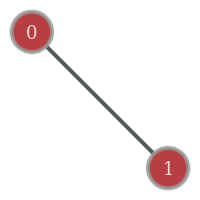

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7feefdb1cdd0, at 0x7fef48e9c290>

In [20]:
graph_draw(ug, vertex_text=ug.vertex_index, vertex_font_size=18,
...            output_size=(200, 200), output="two-nodess.png")

In [19]:
df_mst = pd.read_csv('mst_ut_4cat.csv', index_col=0)

In [20]:
a = df_mst.values
dict = {}

for i in range(0, 780):
    for j in range(i, 780):
        if a[i][j] != 0:
            dict[(i,j)] = a[i][j]

In [21]:
len(dict)

779

In [22]:
import operator
asec_dict = sorted(dict.items(), key=operator.itemgetter(1))
des_dict = sorted(dict.items(), key=operator.itemgetter(1))

In [23]:
des_dict.reverse()

In [24]:
des_dict

[((156, 195), 185.99925364294049),
 ((646, 664), 165.18993802733453),
 ((148, 195), 160.27725331257682),
 ((287, 384), 156.91547543150597),
 ((491, 502), 144.2068244786694),
 ((35, 207), 142.35402862460253),
 ((421, 469), 133.38041738005319),
 ((389, 404), 131.80620162227942),
 ((352, 408), 131.16052903942835),
 ((509, 548), 131.13361368375678),
 ((470, 580), 130.28950348359129),
 ((713, 764), 126.70647315886923),
 ((677, 760), 125.87094426314276),
 ((533, 594), 125.16431602041004),
 ((507, 557), 124.79448532863285),
 ((482, 522), 123.4654841881036),
 ((97, 192), 123.3345476198414),
 ((251, 287), 122.88690216286142),
 ((166, 221), 122.4088029903933),
 ((523, 580), 122.29788324962016),
 ((449, 583), 121.49971319638655),
 ((490, 552), 121.10306212408605),
 ((687, 769), 120.39773647008656),
 ((510, 595), 120.30435070217102),
 ((251, 358), 119.4210619405637),
 ((513, 536), 118.82794328691091),
 ((489, 588), 118.74957478508159),
 ((500, 539), 118.31261991273598),
 ((553, 590), 118.263197504

In [25]:
asec_dict

[((89, 232), 26.123460599031318),
 ((637, 732), 27.491863962536907),
 ((48, 176), 30.947126312065059),
 ((175, 238), 31.234994136447373),
 ((176, 181), 35.701008423613317),
 ((288, 291), 40.635693969997327),
 ((60, 100), 44.885264995713221),
 ((9, 63), 46.072108843128959),
 ((314, 371), 47.684577698570287),
 ((122, 130), 48.858993294385812),
 ((312, 420), 49.198414231343435),
 ((649, 693), 51.071294597940948),
 ((153, 241), 51.86710833530379),
 ((11, 36), 51.930278808334961),
 ((649, 708), 52.043583661418211),
 ((302, 325), 52.34501270534566),
 ((172, 184), 53.925196155189802),
 ((4, 213), 56.130871328283469),
 ((635, 732), 56.149558486535113),
 ((301, 353), 56.594881826941787),
 ((265, 402), 57.573252941321364),
 ((613, 746), 59.290838357074101),
 ((63, 65), 59.539026838226903),
 ((217, 230), 59.547482964267751),
 ((52, 107), 59.567591177563145),
 ((265, 379), 59.65861297414385),
 ((107, 234), 59.852305440464249),
 ((79, 121), 60.777473809353822),
 ((5, 52), 61.295984217564794),
 ((32

In [29]:
print labels

[ 77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.
  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.
  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.
  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.
  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.
  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.
  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.
  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.
  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.
  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.
  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.
  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.
  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.  77.
  77.  77.  

In [30]:
for i in des_dict:
    e = g.add_edge(arr[i[0][0]], arr[i[0][1]])

In [31]:
clr = []
for i in labels:
    if i == 77:
        clr.append('r')
    if i == 73:
        clr.append('b')
    if i == 88:
        clr.append('g')
    if i == 89:
        clr.append('y')

In [ ]:
bv, be = betweenness(g)
for idx,i in enumerate(labels):
    if i == 77:
        bv[idx] = 0.2
    elif i == 73:
        bv[idx] = 0.4
    elif i == 88:
        bv[idx] = 0.6
    else:
        bv[idx] = 0.8
        
for idx, i in enumerate(des_dict):
    be[g.get_edges()[idx]] = i[1]/50
# be.a /= be.a.max() / 5
gt.draw.graphviz_draw(g, vcolor=bv, vorder=bv, elen=be,output="graphviz-draw.pdf", vsize=0.5)
# graph_draw(g,pos=pos, vertex_text=g.vertex_index, vertex_font_size=8,
#            output_size=(1000, 1000), output="two-nodes.png",vertex_fill_color=bv, edge_pen_width=be)

In [32]:
eprop_dict = g.new_edge_property("int")                # Arbitrary python object.
eprop_dict[g.edges().next()] = 75  # In this case, a dict.

vprop_double = g.new_vertex_property("double")            # Double-precision floating point
vprop_double[g.vertex(10)] = 1113.1416


In [33]:
graph_draw(g, vertex_text=g.vertex_index, vertex_font_size=16, vprops=vprop_double,
           output_size=(2000, 2000), output="two-nodes.png")

AttributeError: 'PropertyMap' object has no attribute 'update'

In [27]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vis_data = model.fit_transform(df.values)

In [28]:
from matplotlib import pyplot as plt
vis_x = vis_data[:, 0]
vis_y = vis_data[:, 1]

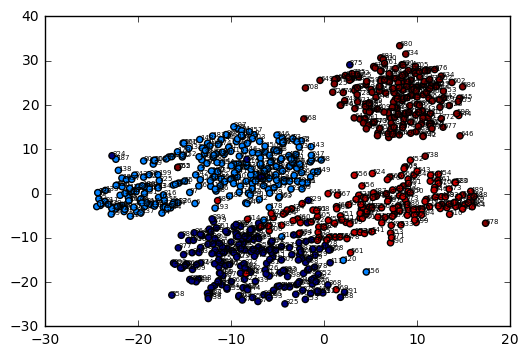

In [29]:
import itertools
plt.scatter(vis_x, vis_y, c=labels)
x = 0
for a,b in zip(vis_x, vis_y): 
    plt.text(a, b, x, size=5)
    x = x+1
plt.savefig('pt_no.png', dpi=2000)

plt.show()

156 [4.5550648790121979, -17.70105740405128] 195 [-12.261212895726908, 10.784723883404896]
646 [14.636154161883162, 13.036678492268962] 664 [8.5108929822984596, 29.015979303325885]
148 [-13.353146118341041, 12.204915567013884] 195 [-12.261212895726908, 10.784723883404896]
287 [-12.51762453874616, -22.519173326479589] 384 [-12.435932837024144, -23.202263295234431]
491 [6.5793304549368372, -5.3597674716647621] 502 [6.2171859363582467, -6.6122062245319215]
35 [-9.2617297283283548, 14.651968615833759] 207 [-9.6846855036946629, 15.093947279039481]
421 [-0.65858295280884138, -22.318555194513312] 469 [1.3175676165623837, -21.691425877265416]
389 [-12.156395672440905, -8.6533868403742407] 404 [-11.7125942584575, -10.169165389811621]
352 [-0.61084678553375704, -18.198593312757826] 408 [-2.1929112340890202, -18.033110865445153]
509 [10.997118595220998, -1.334145286510362] 548 [10.873407983552223, -1.7816729070530193]
470 [12.292303444232083, 2.3144710252098397] 580 [14.136885681177228, 2.4425093

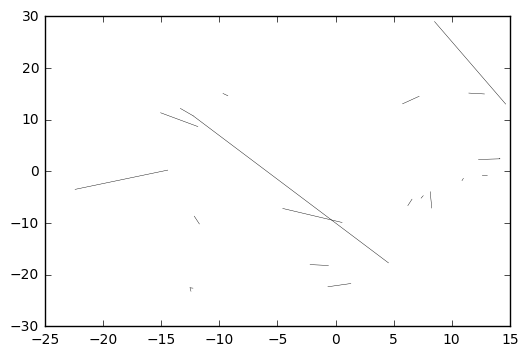

In [31]:
j = 0
for i in des_dict:
    plt.plot([vis_x[i[0][0]],vis_x[i[0][1]]], [vis_y[i[0][0]], vis_y[i[0][1]]], color='black', linewidth=0.3)
    j = j+1
    print (i[0][0], [vis_x[i[0][0]], vis_y[i[0][0]]], i[0][1], [vis_x[i[0][1]],vis_y[i[0][1]]])
    if j>20:
        break
plt.savefig('foo.png', dpi=2000)
plt.show()

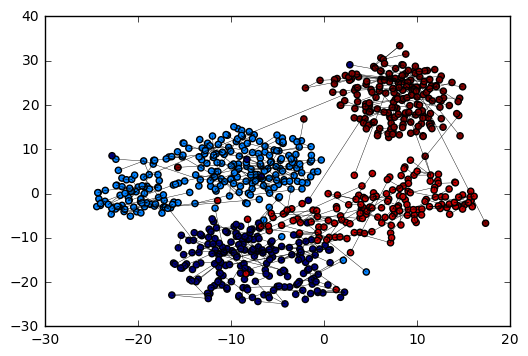

In [32]:
plt.scatter(vis_x, vis_y, c=labels)
for i in des_dict:
    plt.plot([vis_x[i[0][0]],vis_x[i[0][1]]], [vis_y[i[0][0]], vis_y[i[0][1]]], color='black', linewidth=0.3)

plt.savefig('foo.png', dpi=2000)
# #plt.figure(figsize=(70, 70)) # This increases resolution
# #plt.savefig('test.eps', format='eps', dpi=900) # This does, too
# #plt.annotate(..., fontsize='xx-small', ...)
# import pylab as pl
# pl.figure(figsize=(70, 70)) # This increases resolution
# pl.savefig('test.eps', format='eps', dpi=900) # This does, too
# pl.annotate(..., fontsize='xx-small', ...)
plt.show()

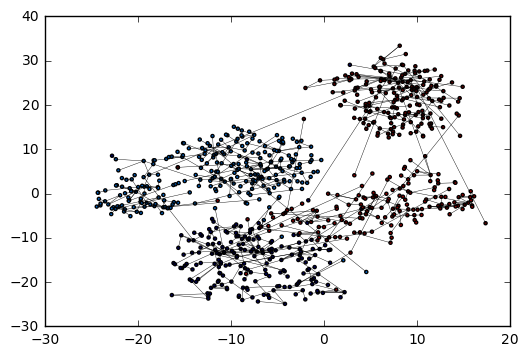

In [33]:
plt.scatter(vis_x, vis_y, c=labels, s=5)
for i in range(0,779):
    plt.plot([vis_x[des_dict[i][0][0]],vis_x[des_dict[i][0][1]]],
             [vis_y[des_dict[i][0][0]], vis_y[des_dict[i][0][1]]],
             color='black', linewidth=0.3)

plt.savefig('foo2.png', dpi=2000)
plt.show()

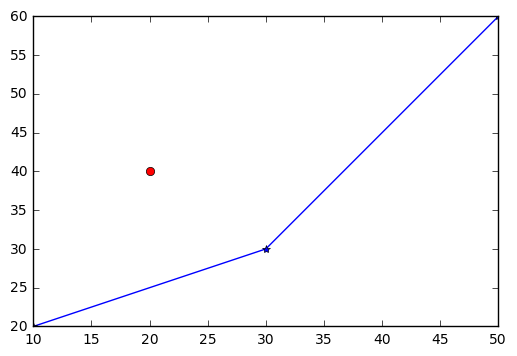

In [34]:

plt.plot([10,30, 50], [20,30, 60],marker = '*')
plt.plot(20, 40, c='red', marker='o')
plt.show()